# Air Quality Linear Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Real_Combine.csv')

In [4]:
df.shape # checking the shape of the data

(1000, 8)

In [5]:
df.head() # checking how our data look like

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,19.9,27.0,12.0,55.0,4.7,8.7,24.1,255.875000
1,21.3,29.0,15.0,45.0,4.5,6.7,14.8,217.083333
2,21.2,29.5,14.0,40.0,4.0,5.4,14.8,229.166667
3,17.3,24.0,11.0,34.0,5.1,11.7,64.4,298.458333
4,18.2,25.0,10.0,43.0,4.8,6.1,14.8,264.916667


In [6]:
df.info() # checking the column types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1000 non-null   float64
 1   TM      1000 non-null   float64
 2   Tm      1000 non-null   float64
 3   H       1000 non-null   float64
 4   VV      1000 non-null   float64
 5   V       1000 non-null   float64
 6   VM      1000 non-null   float64
 7   PM 2.5  995 non-null    float64
dtypes: float64(8)
memory usage: 62.6 KB


In [7]:
df.isnull().sum() # checking the missing values

T         0
TM        0
Tm        0
H         0
VV        0
V         0
VM        0
PM 2.5    5
dtype: int64

In [10]:
df.describe() # checking the statistical summary of the data

,T,TM,Tm,H,VV,V,VM,PM 2.5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,995.000000
mean,27.200200,32.484800,22.873600,58.653000,4.073100,11.707300,20.638500,91.109904
std,4.732819,4.248814,6.169498,15.774962,0.711092,6.009545,8.053452,90.746817
min,14.800000,19.500000,6.000000,14.000000,0.800000,0.900000,3.500000,0.000000
25%,23.500000,30.000000,17.500000,46.000000,4.000000,6.900000,14.800000,26.687800
50%,28.900000,33.500000,25.000000,63.000000,4.000000,11.100000,18.300000,55.708333
75%,30.900000,35.500000,28.000000,71.000000,4.000000,15.700000,25.900000,126.291667
max,35.700000,43.500000,31.500000,94.000000,6.400000,34.800000,74.100000,620.206400


In [ ]:
df.duplicated().sum() # checking the duplication of the data

0

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum() # again checking the missing values

T         0
TM        0
Tm        0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

**Note:** According to the above feature engineering we just have gotten less than 5 null values, so we just have remove them.

**Now Dividing the data into dependent & independent features**

In [ ]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

Checking the Null values after dividing the data into dependent & independent

In [ ]:
X.isnull().sum()

T     0
TM    0
Tm    0
H     0
VV    0
V     0
VM    0
dtype: int64

In [ ]:
y.isnull().sum()

0

Now we know our dependent & independent variables, as we know that we have to apply multivariate data and we want to see the relation between the variable by using pair plot

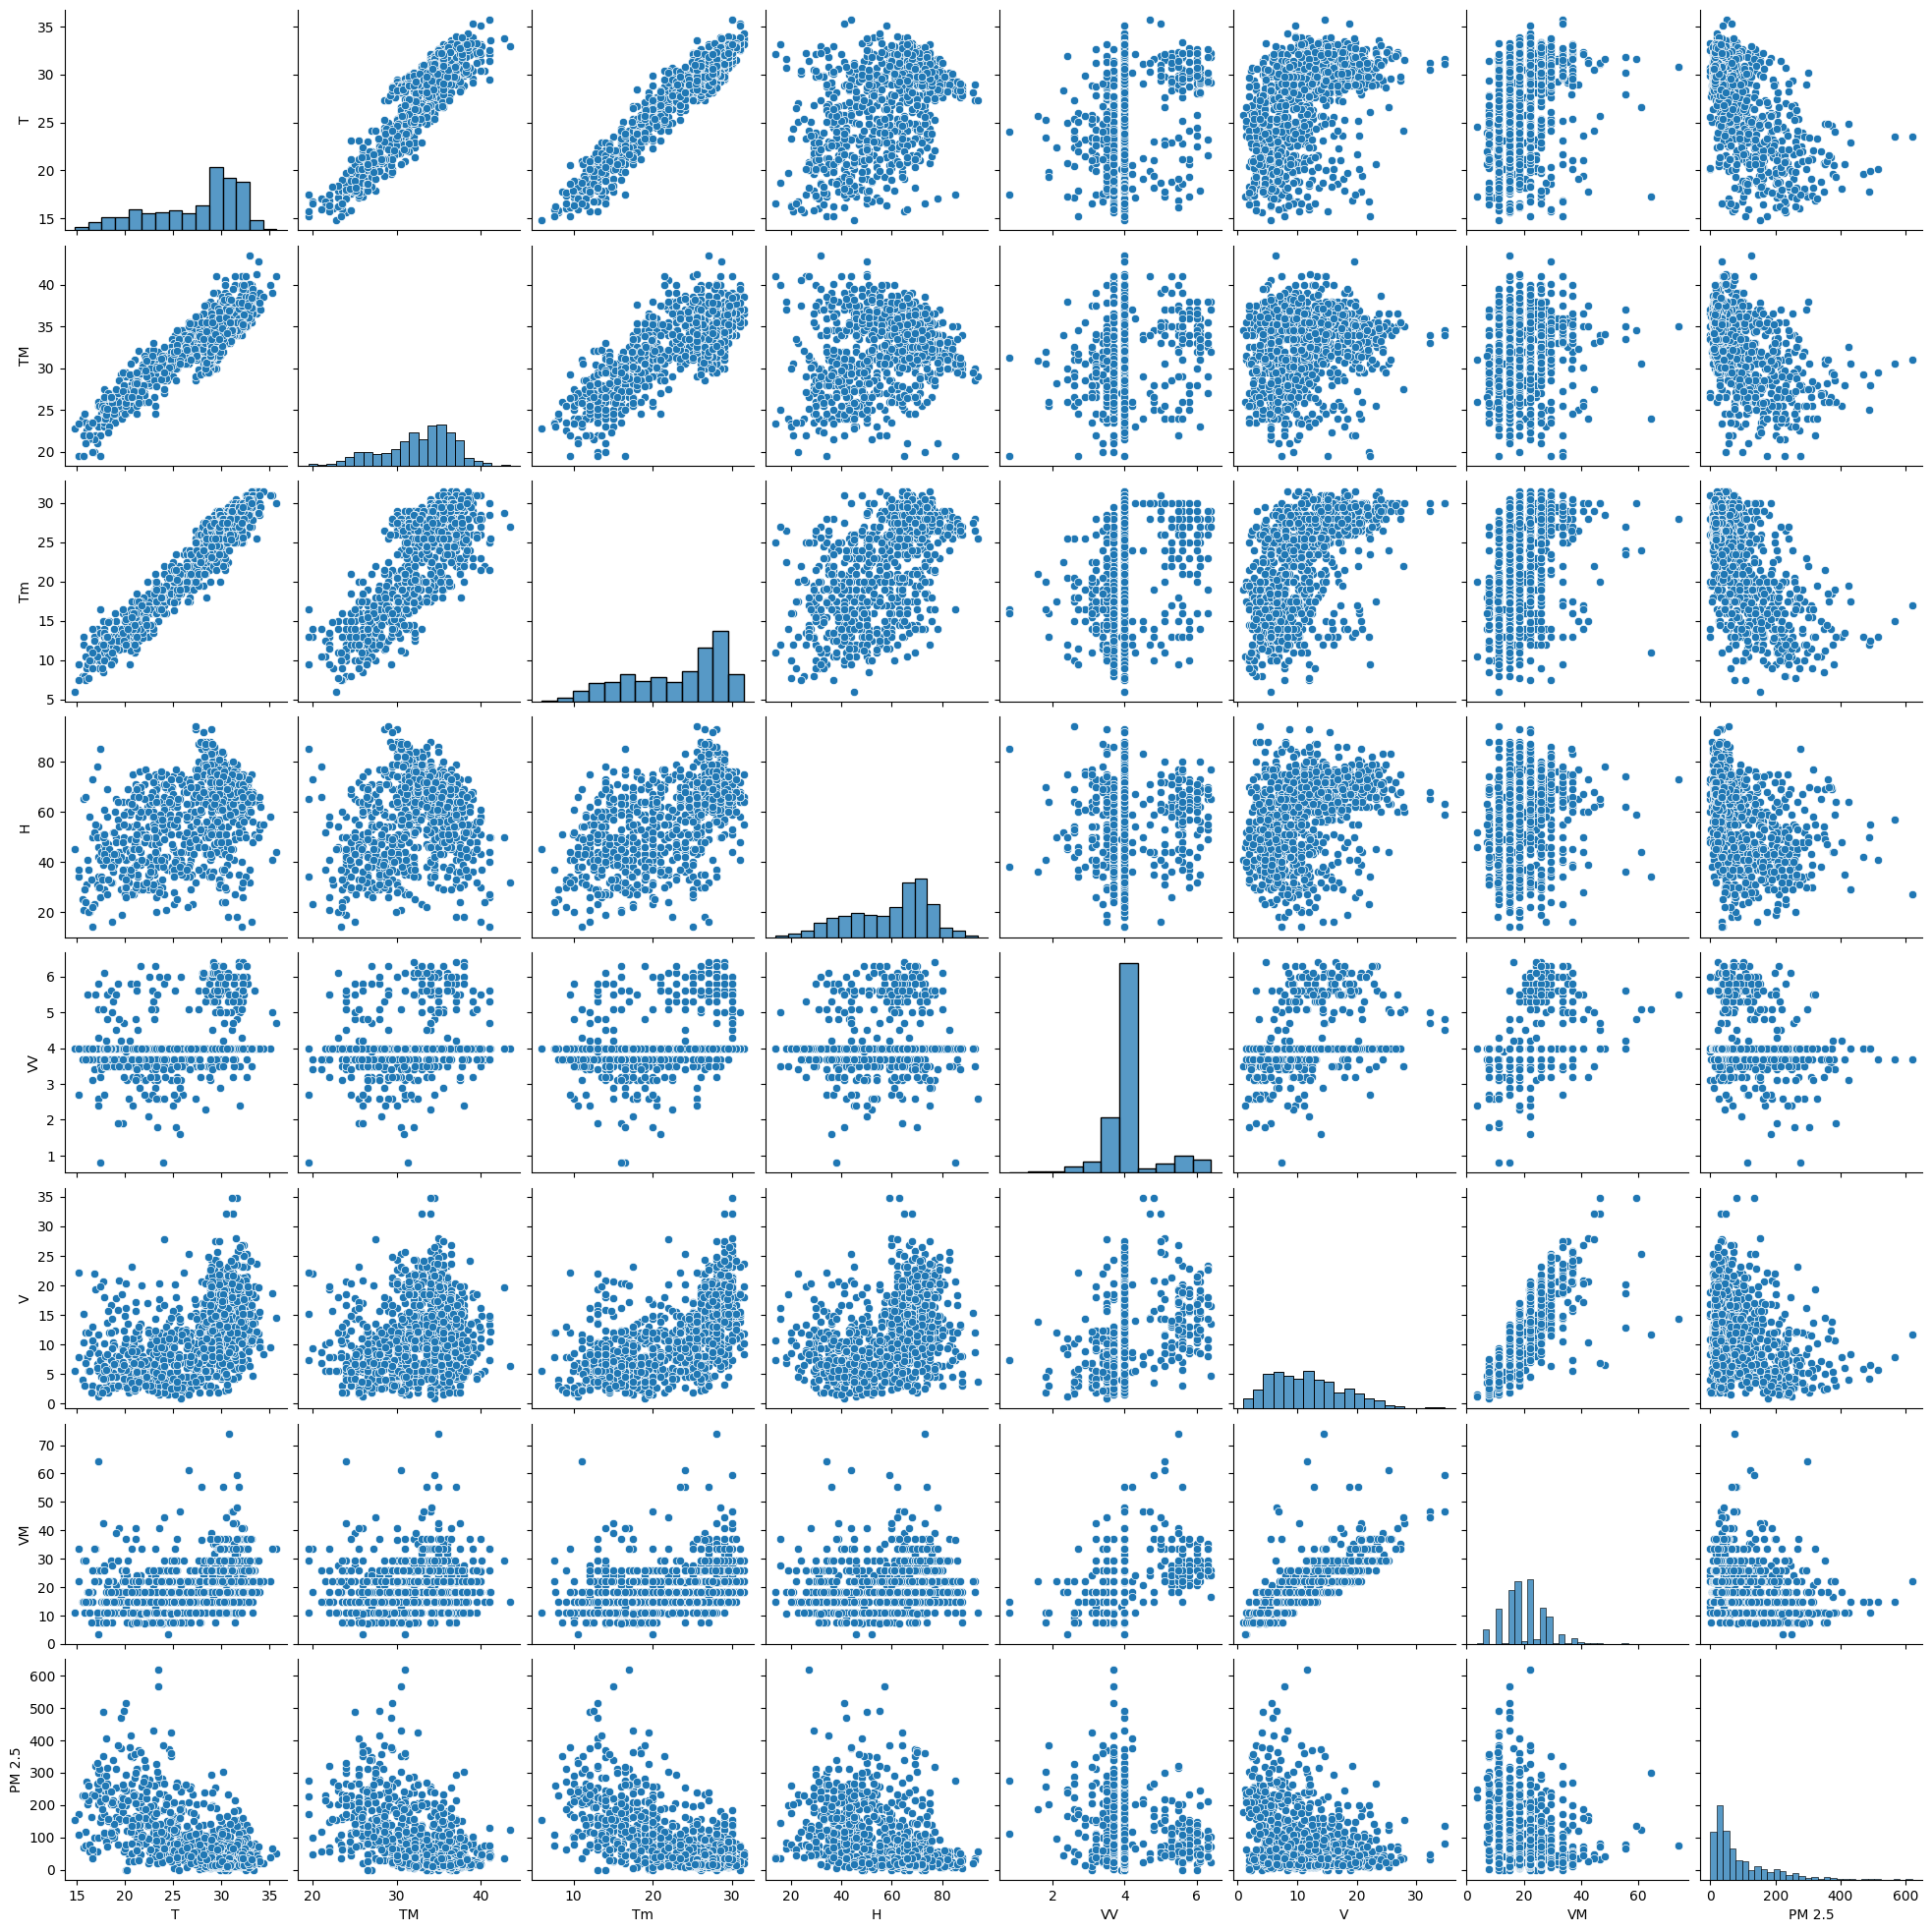

In [ ]:
sns.pairplot(df)

**Check the correlation of the data**

In [ ]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.909062,0.958897,0.490313,0.223053,0.462645,0.319377,-0.620602
TM,0.909062,1.000000,0.777642,0.243076,0.172748,0.223209,0.164319,-0.500466
Tm,0.958897,0.777642,1.000000,0.609502,0.235615,0.572474,0.389390,-0.640814
H,0.490313,0.243076,0.609502,1.000000,0.059342,0.370484,0.201498,-0.429527
VV,0.223053,0.172748,0.235615,0.059342,1.000000,0.315265,0.418512,-0.129870
V,0.462645,0.223209,0.572474,0.370484,0.315265,1.000000,0.779332,-0.355398
VM,0.319377,0.164319,0.389390,0.201498,0.418512,0.779332,1.000000,-0.233747
PM 2.5,-0.620602,-0.500466,-0.640814,-0.429527,-0.129870,-0.355398,-0.233747,1.000000


# Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
X.head()

,T,TM,Tm,H,VV,V,VM
0,19.9,27.0,12.0,55.0,4.7,8.7,24.1
1,21.3,29.0,15.0,45.0,4.5,6.7,14.8
2,21.2,29.5,14.0,40.0,4.0,5.4,14.8
3,17.3,24.0,11.0,34.0,5.1,11.7,64.4
4,18.2,25.0,10.0,43.0,4.8,6.1,14.8


In [ ]:
print(model.feature_importances_)

[0.2552391  0.11974311 0.2856652  0.1154548  0.07386416 0.08644851
 0.06358512]


**Plot graph of feature importances for better visualization**

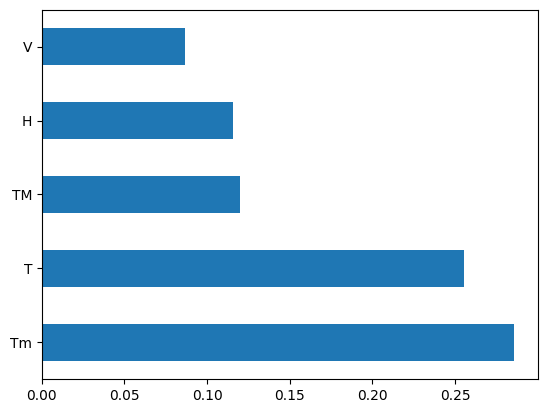

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

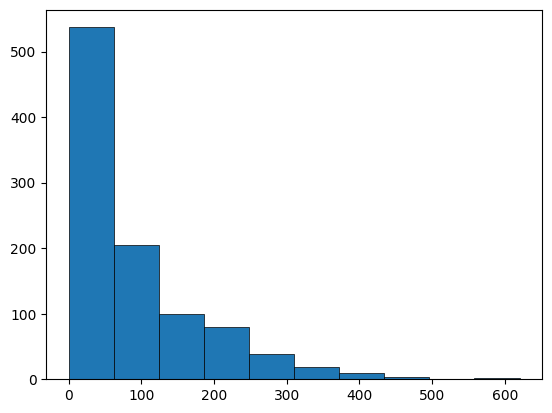

In [ ]:
plt.hist(y, edgecolor='black', linewidth=0.5)
plt.show()

#Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

**Coefficient Values or Slop Values**

In [ ]:
regressor.coef_

array([-9.16822759,  2.9725841 , -3.63104445, -0.51373149,  2.14732335,
        0.07422023,  0.01726942])

In [ ]:
regressor.intercept_ # y-intercept, the out put when all the independent features are zero

347.8153939038835

In [ ]:
print("Coefficient of determination R^2 on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 on train set: 0.40581644150588403


In [ ]:
print("Coefficient of determination R^2 on testing set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 on testing set: 0.48015374865228444


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [ ]:
score.mean()

0.21823784316851236

#Model Evalutaion

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-9.168228
TM,2.972584
Tm,-3.631044
H,-0.513731
VV,2.147323
V,0.074220
VM,0.017269


**Interpreting the coefficients:**

* Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 9.168228 in AQI PM2.5 *.
* Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 2.972584 in AQI PM 2.5 *.
* Holding all other features fixed, a 1 unit increase in Tm is associated with an *decrease of 3.631044 in AQI PM2.5 *.
* Holding all other features fixed, a 1 unit increase in H is associated with an *decrease of 0.513731 in AQI PM2.5 *.
* Holding all other features fixed, a 1 unit increase in VV is associated with an *increase of 2.147323 in AQI PM2.5 *.
* Holding all other features fixed, a 1 unit increase in V is associated with an *increase of 0.074220 in AQI PM2.5 *.
* Holding all other features fixed, a 1 unit increase in VM is associated with an *increase of 0.017269 in AQI PM2.5 *.

In [ ]:
prediction=regressor.predict(X_test)

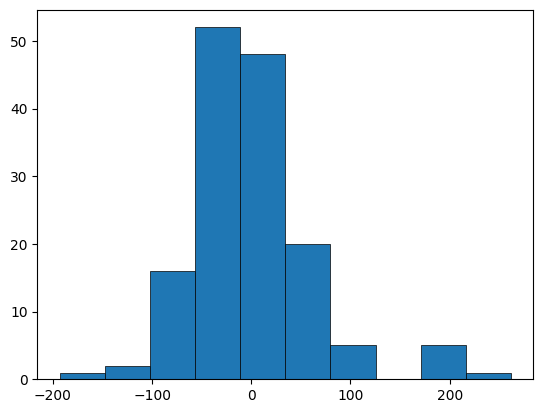

In [ ]:
#sns.histplot(y_test-prediction)
plt.hist(y_test-prediction, edgecolor='black', linewidth=0.5)
plt.show()

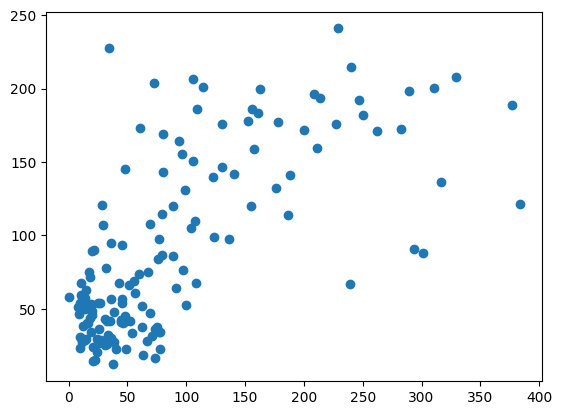

In [ ]:
plt.scatter(y_test,prediction)

#Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors

**Mean Squared Error** (MSE) is the mean of the squared errors

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors

**Comparing these metrics:**

**MAE** is the easiest to understand, because it's the average error.

**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 42.08749186350684
MSE: 3821.7913496758624
RMSE: 61.82063854147628
